In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, auc, plot_roc_curve,ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score, balanced_accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import pickle 
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_csv("Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
train,test = train_test_split(df, test_size=0.2, random_state=123)

In [5]:
#A1
train.reset_index(drop=True,inplace=True)

In [6]:
train.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6457-GIRWB,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.35,69.35,Yes
1,5115-GZDEL,Male,0,No,Yes,72,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),67.20,4671.7,No


In [7]:
print(df.shape)
print(train.shape)
print(test.shape)

(7043, 21)
(5634, 21)
(1409, 21)


In [8]:
train.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
#A2
train.drop(['customerID'],axis=1,inplace=True)

In [10]:
train.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.35,69.35,Yes
1,Male,0,No,Yes,72,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),67.20,4671.7,No
2,Male,1,Yes,No,21,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.10,1474.75,Yes
3,Male,0,Yes,No,25,Yes,No,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.70,2338.35,No
4,Male,1,Yes,No,71,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),24.85,1901,No


In [16]:
train['TotalCharges'] = train['TotalCharges'].astype(float)

In [17]:
train[train['TotalCharges'] == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [18]:
#A3
train['TotalCharges'] = train['TotalCharges'].replace(' ',np.nan)

In [19]:
train.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
Churn               0
dtype: int64

In [20]:
#A4
train['TotalCharges'] = train['TotalCharges'].astype(float)

In [21]:
train.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [22]:
from sklearn.impute import SimpleImputer, KNNImputer

In [23]:
cat = []
for i in train.columns:
    if train[i].dtype == 'O':
        cat.append(i)

In [24]:
cat

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [25]:
#for i in cat:
#        train[i] = pd.Categorical(train[i]).codes

In [26]:
#imp = KNNImputer(n_neighbors=3)

#train_imp = pd.DataFrame(imp.fit_transform(train),columns=train.columns)

In [27]:
train.duplicated().sum()

14

In [28]:
#A5
train.drop_duplicates(keep='first',inplace=True,ignore_index=True)

In [29]:
train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.35,69.35,Yes
1,Male,0,No,Yes,72,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),67.20,4671.70,No
2,Male,1,Yes,No,21,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.10,1474.75,Yes
3,Male,0,Yes,No,25,Yes,No,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.70,2338.35,No
4,Male,1,Yes,No,71,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),24.85,1901.00,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5615,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
5616,Male,0,Yes,Yes,54,Yes,Yes,DSL,No,No,Yes,No,No,Yes,Two year,No,Credit card (automatic),63.35,3409.10,No
5617,Female,0,Yes,Yes,14,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,87.25,1258.60,Yes
5618,Female,1,Yes,Yes,29,No,No phone service,DSL,No,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed check,35.65,1025.15,No


In [30]:
#A6
train.dropna(inplace=True)
train.reset_index(drop=True,inplace=True)

In [31]:
train.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [32]:
for i in cat:
    if train[i].dtype == 'O':
        print(f"{i} has {train[i].nunique()} categories\nThey are:\n{train[i].unique()}\n") 
        

gender has 2 categories
They are:
['Male' 'Female']

Partner has 2 categories
They are:
['No' 'Yes']

Dependents has 2 categories
They are:
['No' 'Yes']

PhoneService has 2 categories
They are:
['Yes' 'No']

MultipleLines has 3 categories
They are:
['No' 'No phone service' 'Yes']

InternetService has 3 categories
They are:
['Fiber optic' 'DSL' 'No']

OnlineSecurity has 3 categories
They are:
['No' 'Yes' 'No internet service']

OnlineBackup has 3 categories
They are:
['No' 'Yes' 'No internet service']

DeviceProtection has 3 categories
They are:
['No' 'Yes' 'No internet service']

TechSupport has 3 categories
They are:
['No' 'Yes' 'No internet service']

StreamingTV has 3 categories
They are:
['No' 'Yes' 'No internet service']

StreamingMovies has 3 categories
They are:
['No' 'Yes' 'No internet service']

Contract has 3 categories
They are:
['Month-to-month' 'Two year' 'One year']

PaperlessBilling has 2 categories
They are:
['Yes' 'No']

PaymentMethod has 4 categories
They are:
['Elect

In [33]:
col = train.columns

In [39]:
#A7
X_train = train.drop(['Churn'],axis=1)
y_train = train['Churn']

In [40]:
cat1 = []
for i in X_train.columns:
    if X_train[i].dtype == 'O':
        cat1.append(i)

In [41]:
cat1

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [42]:
#A8
encoder = OneHotEncoder(drop='first',dtype=int)

enc_data = pd.DataFrame(encoder.fit_transform(X_train[cat1]).toarray())
enc_data.columns = encoder.get_feature_names_out()

X_train = X_train.join(enc_data)

X_train.drop(cat1, axis=1,inplace=True)



In [43]:
col1 = X_train.columns

In [44]:
#A9
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=col1)

In [45]:
X_train.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.508458,0.005833,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.000000,0.487065,0.536914,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.281690,0.505970,0.168007,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.338028,0.770647,0.267661,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.0,0.985915,0.065672,0.217194,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

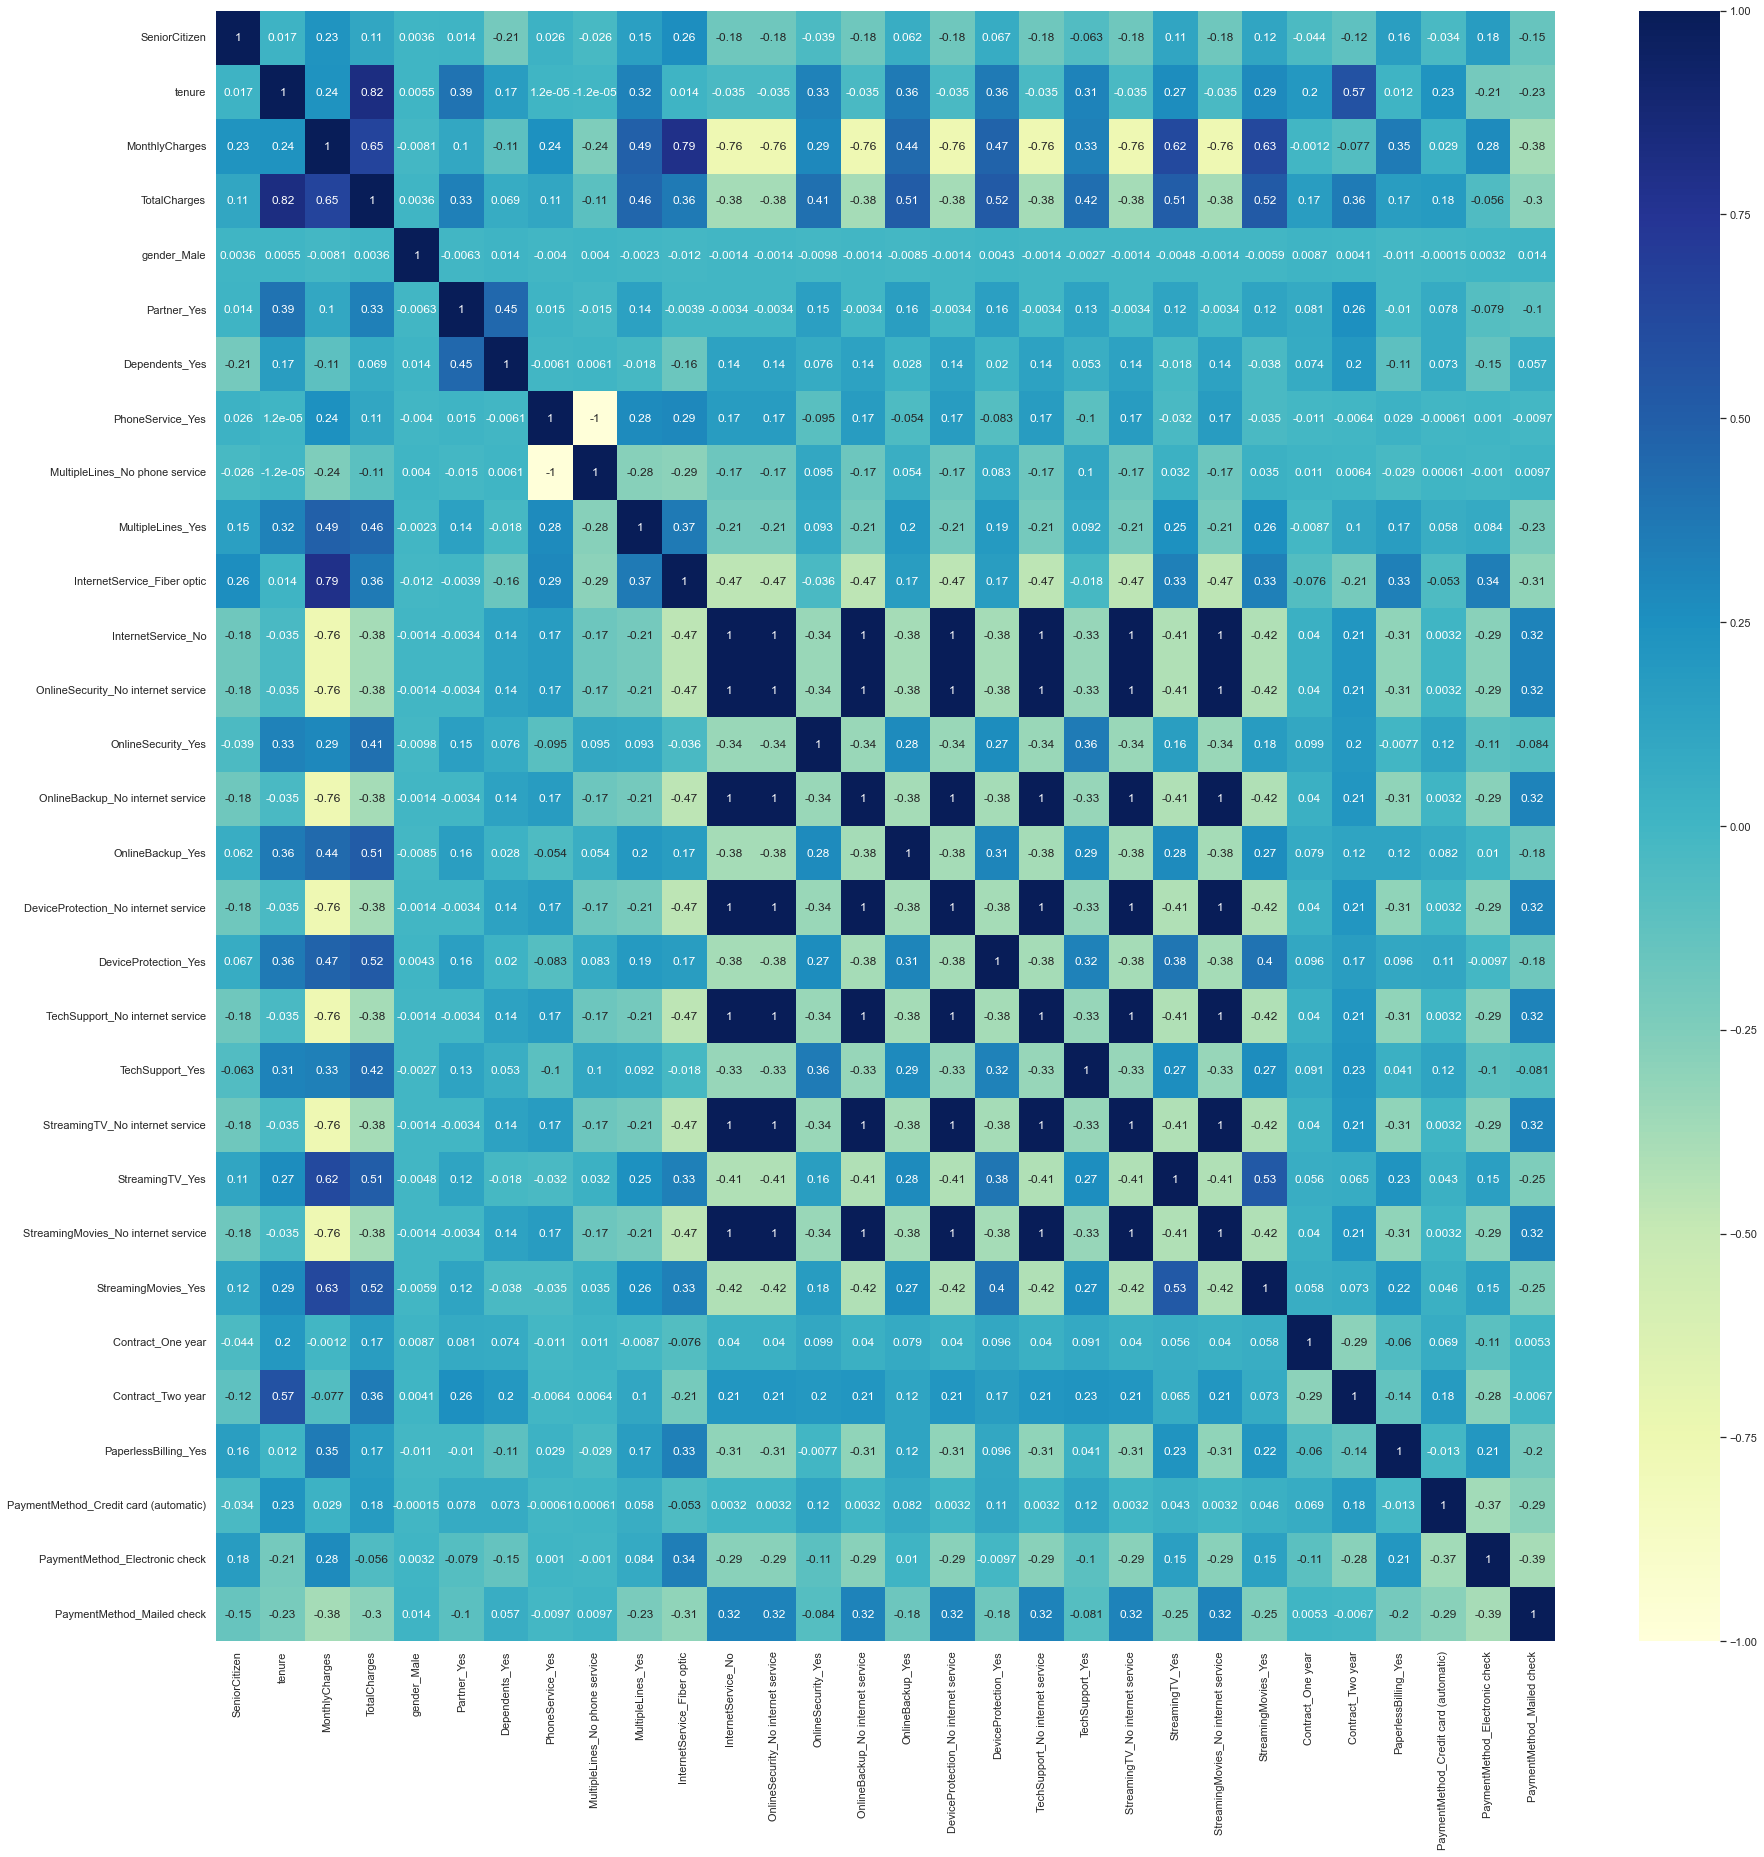

In [46]:
plt.figure(figsize=(30,30))
cors = X_train.corr()
sns.heatmap(cors, annot= True, cmap="YlGnBu")

<AxesSubplot:>

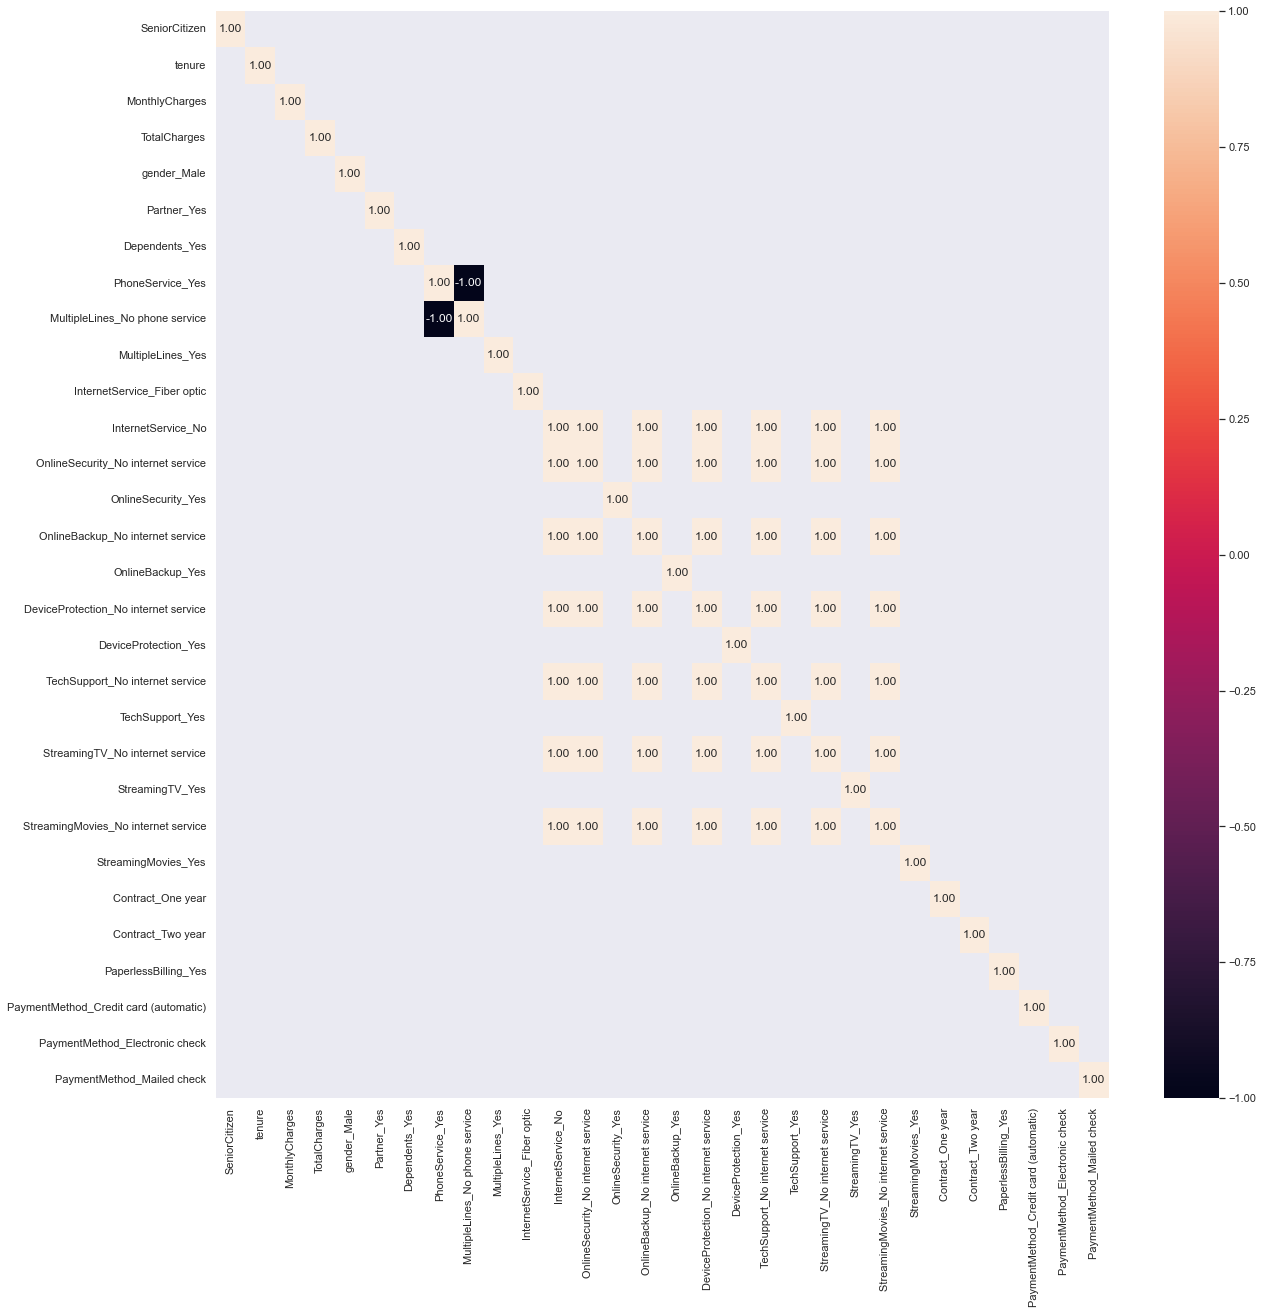

In [47]:
mask = cors[(cors >= 0.85)|(cors <= -0.85)]

plt.figure(figsize=(20,20))
sns.heatmap(mask, vmin=-1, vmax=1, annot=True, fmt='0.2f')

In [44]:
decision_tree = DecisionTreeClassifier(max_depth = 10)
decision_tree.fit(X_train, y_train)
predictors = col1 

coef = pd.Series(decision_tree.feature_importances_, predictors).sort_values(ascending=False)
coef.to_frame()

,0
tenure,0.271819
InternetService_Fiber optic,0.191908
TotalCharges,0.146137
MonthlyCharges,0.125968
Contract_Two year,0.033961
Contract_One year,0.024659
OnlineSecurity_Yes,0.022457
PaperlessBilling_Yes,0.020355
PaymentMethod_Electronic check,0.019275
gender_Male,0.015886


In [45]:
col1

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [46]:
def prepare(df):
    df.reset_index(drop=True,inplace=True)
    df.drop(['customerID'],axis=1,inplace=True)
    
    df['TotalCharges'] = df['TotalCharges'].replace(' ',np.nan)
    df['TotalCharges'] = df['TotalCharges'].astype(float)
    df.drop_duplicates(keep='first',inplace=True,ignore_index=True)
    df.dropna(inplace=True)
    df.reset_index(drop=True,inplace=True)
    
    X_test = df.drop(['Churn'],axis=1)
    y_test = df['Churn']
    
    cat1 = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
     'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
     'Contract','PaperlessBilling','PaymentMethod']
    
    enc_data = pd.DataFrame(encoder.transform(X_test[cat1]).toarray())
    enc_data.columns = encoder.get_feature_names_out()

    X_test = X_test.join(enc_data)

    X_test.drop(cat1, axis=1,inplace=True)
    
    
    X_test = scaler.transform(X_test)
    X_test = pd.DataFrame(X_test, columns=col1)
    
    return X_test,y_test
    
    


In [47]:
X_test,y_test = prepare(test)

In [48]:
def model_to_use(input_ml_algo):
    if input_ml_algo == 'DT':
        model = DecisionTreeClassifier()
    elif input_ml_algo == 'RF':
        model = RandomForestClassifier()
    elif input_ml_algo == 'XGBC':
        model = XGBClassifier()
    elif input_ml_algo == 'LGBMC':
        model = LGBMClassifier()
    elif input_ml_algo=='LR':
        model=LogisticRegression()
    elif input_ml_algo=='KNN':
        model=KNeighborsClassifier()
    return model

In [49]:
#Write a function evaluate the performance of the model, 
# print the AUC curve as well as the confusion matrix table
def performance(model,X_train,y_train,X_test, y_test):
    y_pred = model.predict(X_test)

    # Predict probability for test dataset
    y_pred_prob = model.predict_proba(X_test)
    y_pred_prob = [x[1] for x in y_pred_prob]

    disp = ConfusionMatrixDisplay.from_estimator(
    model, X_test, y_test, 
    cmap='Blues', values_format='d'

 )

    print("\n Accuracy Score : \n ",accuracy_score(y_test,y_pred))
    print("\n AUC Score : \n", roc_auc_score(y_test, y_pred_prob))
    print("\n Confusion Matrix : \n ",confusion_matrix(y_test, y_pred))
    print("\n Classification Report : \n",classification_report(y_test, y_pred))

    print("\n ROC curve : \n")
    sns.set_style("white")
    plot_roc_curve(model, X_test, y_test)
    plt.show()


 Accuracy Score : 
  0.8079658605974396

 AUC Score : 
 0.85074160831444

 Confusion Matrix : 
  [[916  96]
 [174 220]]

 Classification Report : 
               precision    recall  f1-score   support

          No       0.84      0.91      0.87      1012
         Yes       0.70      0.56      0.62       394

    accuracy                           0.81      1406
   macro avg       0.77      0.73      0.75      1406
weighted avg       0.80      0.81      0.80      1406


 ROC curve : 



/opt/anaconda3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


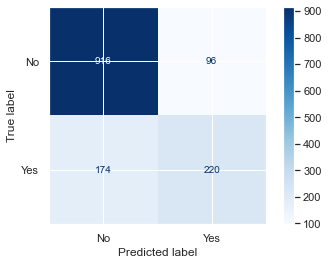

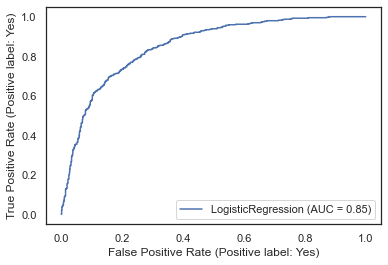

In [50]:
model1 = model_to_use("LR")
model1.fit(X_train, y_train)
performance(model1,X_train,y_train,X_test, y_test)


 Accuracy Score : 
  0.7908961593172119

 AUC Score : 
 0.8376311671114143

 Confusion Matrix : 
  [[921  91]
 [203 191]]

 Classification Report : 
               precision    recall  f1-score   support

          No       0.82      0.91      0.86      1012
         Yes       0.68      0.48      0.57       394

    accuracy                           0.79      1406
   macro avg       0.75      0.70      0.71      1406
weighted avg       0.78      0.79      0.78      1406


 ROC curve : 



/opt/anaconda3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


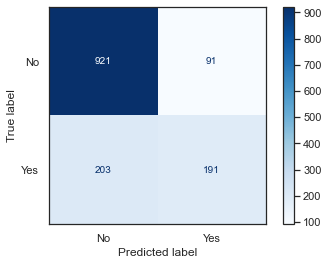

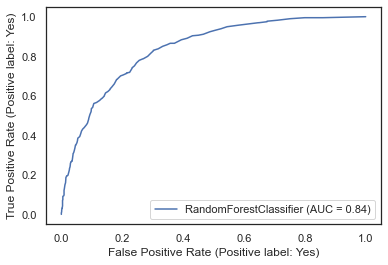

In [51]:
model2 = model_to_use("RF")
model2.fit(X_train, y_train)
performance(model2,X_train,y_train,X_test, y_test)


 Accuracy Score : 
  0.7652916073968705

 AUC Score : 
 0.7865010734134548

 Confusion Matrix : 
  [[880 132]
 [198 196]]

 Classification Report : 
               precision    recall  f1-score   support

          No       0.82      0.87      0.84      1012
         Yes       0.60      0.50      0.54       394

    accuracy                           0.77      1406
   macro avg       0.71      0.68      0.69      1406
weighted avg       0.76      0.77      0.76      1406


 ROC curve : 



/opt/anaconda3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


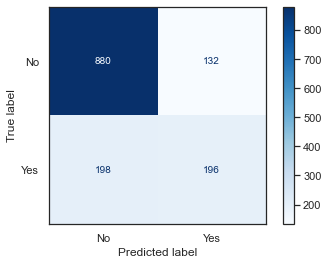

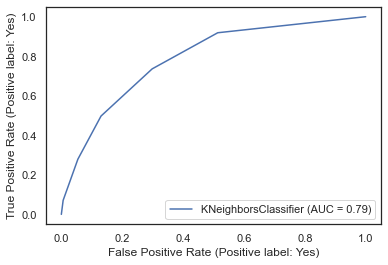

In [52]:
model3 = model_to_use("KNN")
model3.fit(X_train, y_train)
performance(model3,X_train,y_train,X_test, y_test)

In [60]:
model5 = model_to_use("XGBC")
model5.fit(X_train, y_train)
performance(model5,X_train,y_train,X_test, y_test)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got ['No' 'Yes']

In [53]:
y_train.value_counts()

No     4144
Yes    1468
Name: Churn, dtype: int64

### Optimization by balancing

In [ ]:
#!pip install imblearn

In [54]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [56]:
ros = RandomOverSampler()

X_ros, y_ros = ros.fit_resample(X_train,y_train)

In [57]:
y_ros.value_counts()

Yes    4144
No     4144
Name: Churn, dtype: int64


 Accuracy Score : 
  0.7560455192034139

 AUC Score : 
 0.8511779960273669

 Confusion Matrix : 
  [[744 268]
 [ 75 319]]

 Classification Report : 
               precision    recall  f1-score   support

          No       0.91      0.74      0.81      1012
         Yes       0.54      0.81      0.65       394

    accuracy                           0.76      1406
   macro avg       0.73      0.77      0.73      1406
weighted avg       0.81      0.76      0.77      1406


 ROC curve : 



/opt/anaconda3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


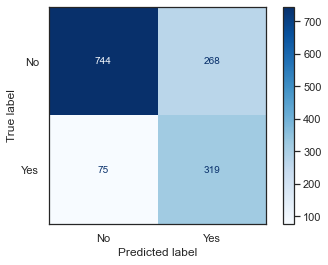

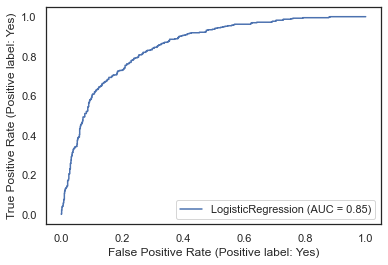

In [58]:
model6 = model_to_use("LR")
model6.fit(X_ros, y_ros)
performance(model6,X_ros,y_ros,X_test, y_test)


 Accuracy Score : 
  0.7937411095305832

 AUC Score : 
 0.8353714813105676

 Confusion Matrix : 
  [[890 122]
 [168 226]]

 Classification Report : 
               precision    recall  f1-score   support

          No       0.84      0.88      0.86      1012
         Yes       0.65      0.57      0.61       394

    accuracy                           0.79      1406
   macro avg       0.75      0.73      0.73      1406
weighted avg       0.79      0.79      0.79      1406


 ROC curve : 



/opt/anaconda3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


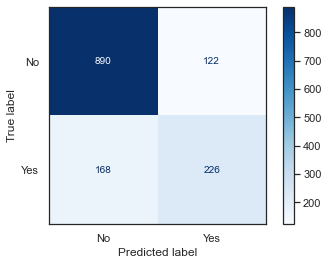

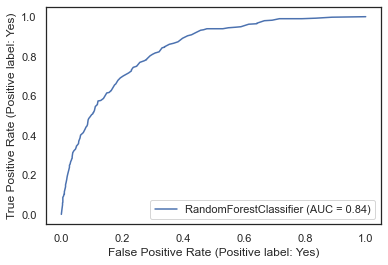

In [59]:
model7 = model_to_use("RF")
model7.fit(X_ros, y_ros)
performance(model7,X_ros,y_ros,X_test, y_test)


 Accuracy Score : 
  0.6948790896159317

 AUC Score : 
 0.7740702935334364

 Confusion Matrix : 
  [[686 326]
 [103 291]]

 Classification Report : 
               precision    recall  f1-score   support

          No       0.87      0.68      0.76      1012
         Yes       0.47      0.74      0.58       394

    accuracy                           0.69      1406
   macro avg       0.67      0.71      0.67      1406
weighted avg       0.76      0.69      0.71      1406


 ROC curve : 



/opt/anaconda3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


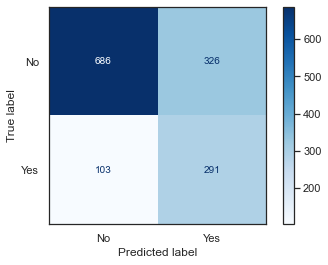

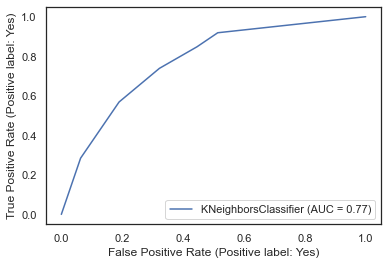

In [60]:
model8 = model_to_use("KNN")
model8.fit(X_ros, y_ros)
performance(model8,X_ros,y_ros,X_test, y_test)

In [67]:
test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,No,Yes,13,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,30.15,382.20,No
1,Female,0,No,No,35,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),23.30,797.10,No
2,Female,0,Yes,Yes,18,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,309.25,No
3,Male,0,No,No,43,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),75.35,3161.40,No
4,Female,0,No,No,51,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.65,1020.75,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,Female,0,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,77.15,77.15,Yes
1402,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.30,19.30,Yes
1403,Male,0,No,No,6,Yes,No,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,85.35,489.45,Yes
1404,Male,0,Yes,Yes,66,No,No phone service,DSL,No,No,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),54.65,3632.00,No


In [86]:
new_data = df.drop(['Churn'],axis=1)
new_data.to_csv("new_data.csv", index=False)

In [69]:
new_data1 = new_data.copy()

In [70]:
def prep(df):
    df.reset_index(drop=True,inplace=True)
    df['TotalCharges'] = df['TotalCharges'].replace(' ',np.nan)
    df['TotalCharges'] = df['TotalCharges'].astype(float)
    df.drop_duplicates(keep='first',inplace=True,ignore_index=True)
    df.dropna(inplace=True)
    df.reset_index(drop=True,inplace=True)
    cust = df['customerID']
    df.drop(['customerID'],axis=1,inplace=True)
    
    
    cat1 = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
     'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
     'Contract','PaperlessBilling','PaymentMethod']
    
    enc_data = pd.DataFrame(encoder.transform(df[cat1]).toarray())
    enc_data.columns = encoder.get_feature_names_out()

    df = df.join(enc_data)

    df.drop(cat1, axis=1,inplace=True)
    
    col1 = df.columns
    
    df = scaler.transform(df)
    df = pd.DataFrame(df, columns=col1)
    
    return cust,df
    

In [71]:
cust,c_data = prep(new_data1)

In [72]:
c_data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.619718,0.239303,0.210241,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.014085,0.521891,0.015330,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,0.323944,0.662189,0.227521,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
7028,0.0,1.000000,0.845274,0.847461,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
7029,0.0,0.140845,0.112935,0.037809,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7030,1.0,0.042254,0.558706,0.033210,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [73]:
pred = model6.predict(c_data)

In [74]:
pred

array(['Yes', 'No', 'Yes', ..., 'Yes', 'Yes', 'No'], dtype=object)

In [75]:
results = pd.DataFrame({'Cust_ID':cust,"Churn_pred":pred})

In [76]:
results 

,Cust_ID,Churn_pred
0,7590-VHVEG,Yes
1,5575-GNVDE,No
2,3668-QPYBK,Yes
3,7795-CFOCW,No
4,9237-HQITU,Yes
...,...,...
7027,6840-RESVB,No
7028,2234-XADUH,No
7029,4801-JZAZL,Yes
7030,8361-LTMKD,Yes


In [77]:
targ_cust=results[results['Churn_pred'] == 'Yes'].reset_index(drop=True)['Cust_ID']

In [79]:
targ_cust

0       7590-VHVEG
1       3668-QPYBK
2       9237-HQITU
3       9305-CDSKC
4       1452-KIOVK
           ...    
2856    9767-FFLEM
2857    8456-QDAVC
2858    7750-EYXWZ
2859    4801-JZAZL
2860    8361-LTMKD
Name: Cust_ID, Length: 2861, dtype: object

In [81]:
# save the model
from pickle import dump

dump(model6, open('LR_model.pkl', 'wb'))

# save encoder
dump(encoder, open('enc_class.pkl', 'wb'))

# save scaler
dump(scaler, open('scal_class.pkl', 'wb'))

In [99]:
%%writefile churn.py

import streamlit as st
import numpy as np 
import pandas as pd
import pickle

model = pickle.load(open('LR_model.pkl', 'rb'))
scaler = pickle.load(open('scal_class.pkl', 'rb'))
encoder = pickle.load(open('enc_class.pkl', 'rb'))

df = st.file_uploader('Upload a CSV',type='csv')

if df is not None:
    # read CSV file into a dataframe
    df = pd.read_csv(df)
else:
    st.stop()


def prep(df):
    df['TotalCharges'] = df['TotalCharges'].replace(' ',np.nan)
    df['TotalCharges'] = df['TotalCharges'].astype(float)
    df.drop_duplicates(keep='first',inplace=True,ignore_index=True)
    df.dropna(inplace=True)
    df.reset_index(drop=True,inplace=True)
    cust = df['customerID']
    df.drop(['customerID'],axis=1,inplace=True)
    
    
    cat1 = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
     'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
     'Contract','PaperlessBilling','PaymentMethod']
    
    enc_data = pd.DataFrame(encoder.transform(df[cat1]).toarray())
    enc_data.columns = encoder.get_feature_names_out()

    df = df.join(enc_data)

    df.drop(cat1, axis=1,inplace=True)
    
    col1 = df.columns
    
    df = scaler.transform(df)
    df = pd.DataFrame(df, columns=col1)
    
    return cust,df

cust,c_data = prep(df)

pred = model.predict(c_data)
results = pd.DataFrame({'Cust_ID':cust,"Churn_pred":pred})

targ_cust = results[results['Churn_pred'] == 'Yes'].reset_index(drop=True)['Cust_ID']

c1,c2 = st.columns(2)

with c1:
    if st.button('Prediction'):
        st.dataframe(results)
        csv1 = results.to_csv(index=False)
        st.download_button('Download Predictions',csv1,file_name='predictions.csv')
with c2:
    if st.button('Churn Customers'):
        st.dataframe(targ_cust)
        csv2 = targ_cust.to_csv(index=False)
        st.download_button('Download Target customer list',csv2,file_name='churn_cust.csv')

Overwriting churn.py
